# Clean and PreProcess

In [1]:
import pandas as pd

In [2]:
github_url = 'https://raw.githubusercontent.com/marymorkos/maternalmortalityhealthriskdata/main/Maternal%20Health%20Risk%20Data%20Set%204.csv'
maternalhealth_df = pd.read_csv(github_url)

In [3]:
maternalhealth_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
##Age: Age in years when a woman is pregnant.
##SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
##DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
##BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
##HeartRate: A normal resting heart rate in beats per minute.
##Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

In [5]:
# Check for missing values
print("Missing values:\n", maternalhealth_df.isnull().sum())

Missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [6]:
import numpy as np

numerical_cols = maternalhealth_df.select_dtypes(include=np.number).columns
maternalhealth_df[numerical_cols] = maternalhealth_df[numerical_cols].fillna(maternalhealth_df[numerical_cols].mean())

print("Missing values after filling with average:\n", maternalhealth_df.isnull().sum())

Missing values after filling with average:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [7]:
print("Duplicate rows:\n", maternalhealth_df.duplicated().sum())

Duplicate rows:
 562


In [8]:
maternalhealth_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# Visualize what we have

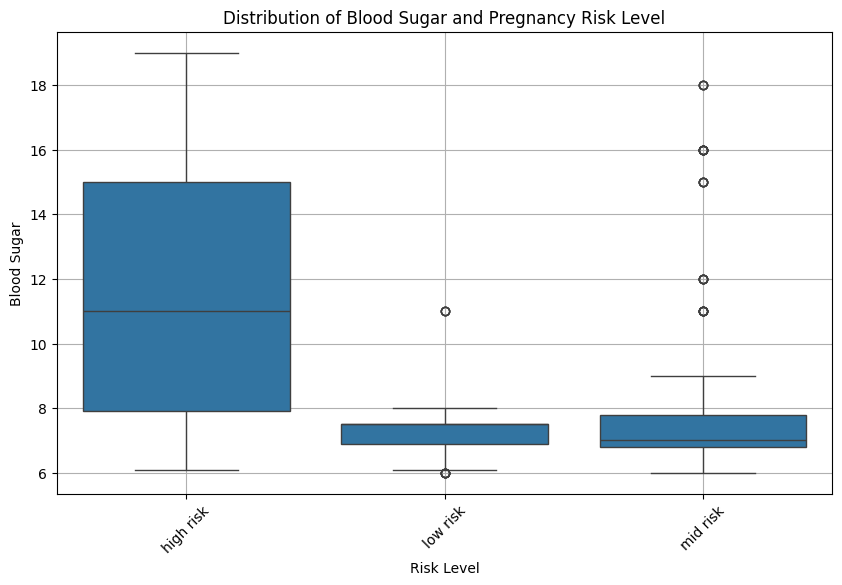

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of 'type' variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='BS', data=maternalhealth_df)
plt.xlabel('Risk Level')
plt.ylabel('Blood Sugar')
plt.title('Distribution of Blood Sugar and Pregnancy Risk Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better readability
plt.show()

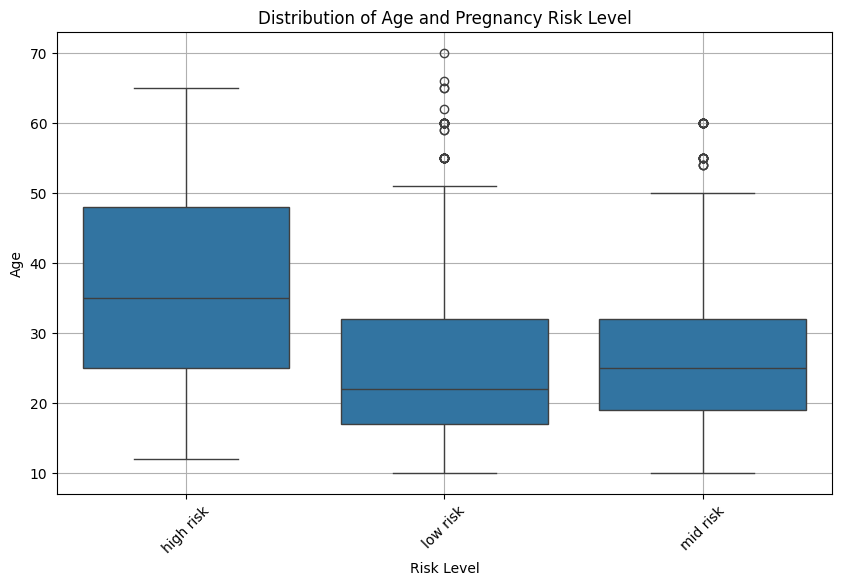

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='Age', data=maternalhealth_df)
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.title('Distribution of Age and Pregnancy Risk Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

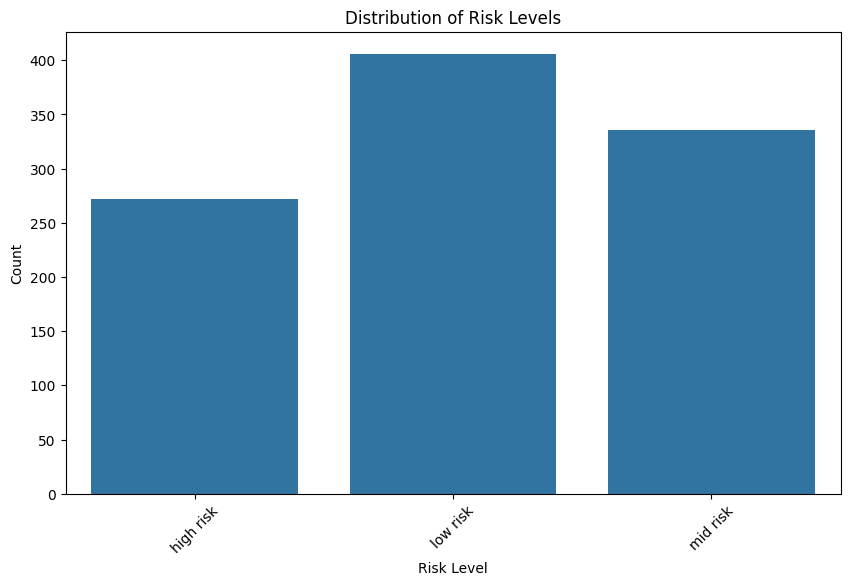

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RiskLevel', data=maternalhealth_df)
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Distribution of Risk Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Prediction One: Random Forest Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
# Split data into predictors (X) and target (y)
X = maternalhealth_df.drop(columns=['RiskLevel'])
y = maternalhealth_df['RiskLevel']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)

In [17]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.812807881773399


In [18]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[40  1  6]
 [ 3 61 16]
 [ 3  9 64]]


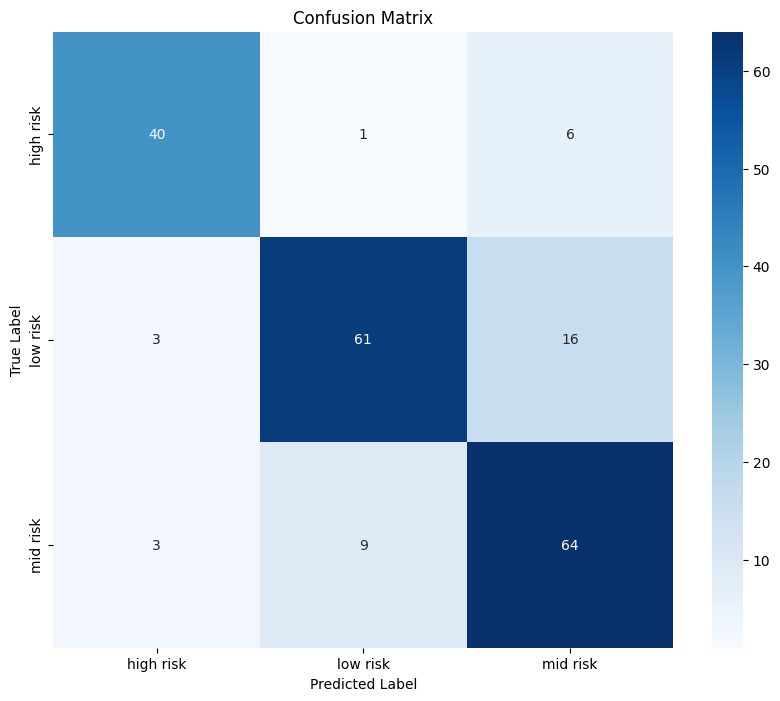

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
# Split data into predictors (X) and target (y)
X = maternalhealth_df.drop(columns=['RiskLevel'])
y = maternalhealth_df['RiskLevel']

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.812807881773399


In [26]:
feature_importances = model.feature_importances_

In [27]:
# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [28]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

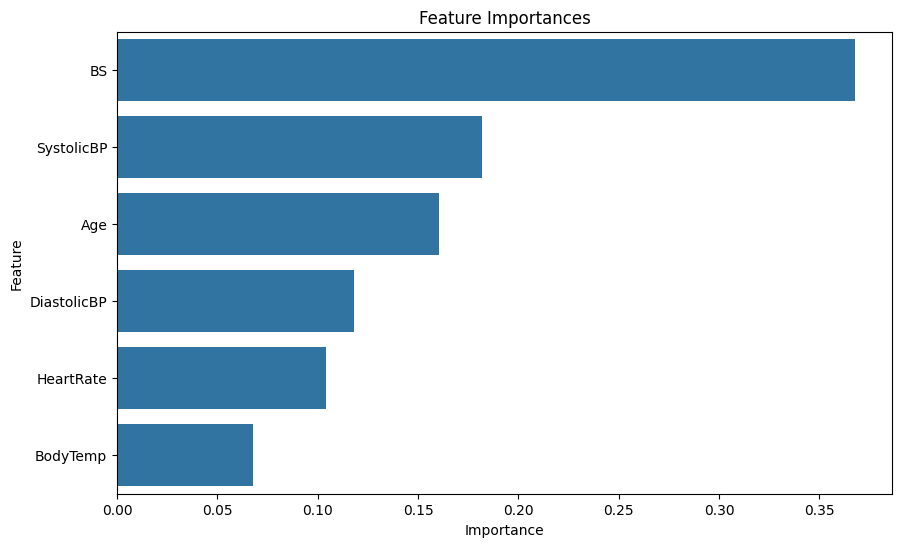

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
maternalhealth_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [32]:
# Splitting data into training and testing sets
X = maternalhealth_df[['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'BS', 'HeartRate']]
y = maternalhealth_df['RiskLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.625615763546798


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
cm = confusion_matrix(y_test, y_pred)

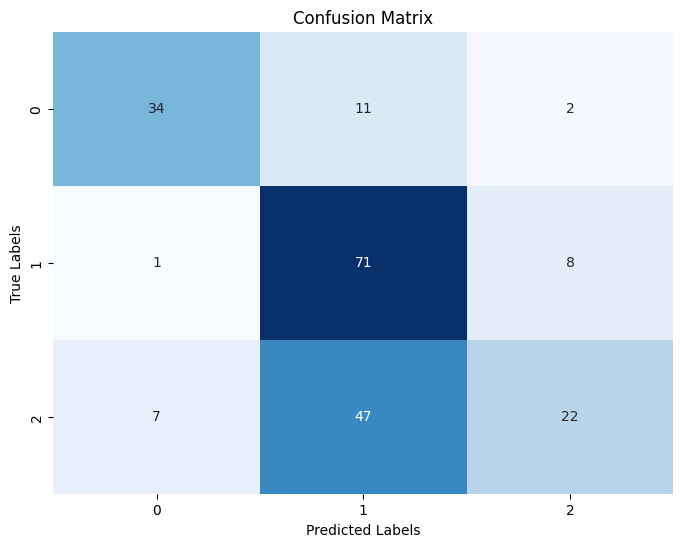

Classification Report:
              precision    recall  f1-score   support

   high risk       0.81      0.72      0.76        47
    low risk       0.55      0.89      0.68        80
    mid risk       0.69      0.29      0.41        76

    accuracy                           0.63       203
   macro avg       0.68      0.63      0.62       203
weighted avg       0.66      0.63      0.60       203



In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)
##bird species is encoded
##Swimming Birds 0
##Wading Birds 1
##Terrestrial Birds 2
##Raptors 3
##Scansorial Birds 4
##Singing Birds 5

# Preditction Two: Linear Regression

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

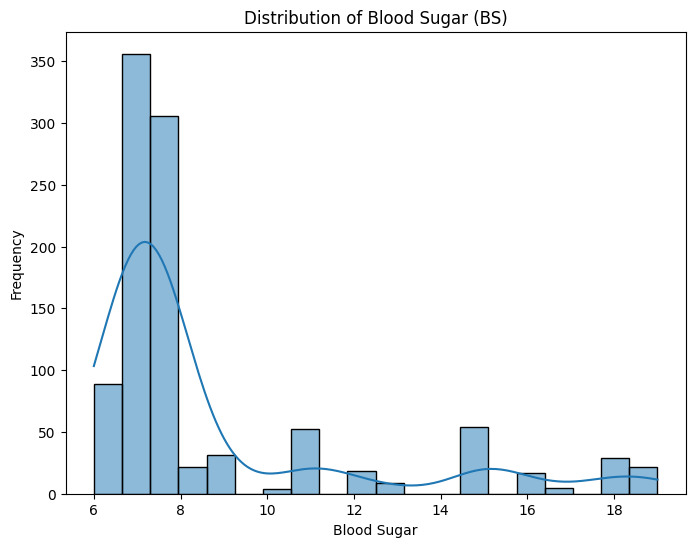

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(maternalhealth_df['BS'], bins=20, kde=True)
plt.title('Distribution of Blood Sugar (BS)')
plt.xlabel('Blood Sugar')
plt.ylabel('Frequency')
plt.show()

In [41]:
##create yo model
predictors = ['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate']
target = 'BS'

In [42]:
##yess split it up
X_train, X_test, y_train, y_test = train_test_split(maternalhealth_df[predictors], maternalhealth_df[target], test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 7.811663599917255
R-squared (R^2) Score: 0.22019835741054516


In [46]:
coefficients = pd.Series(model.coef_, index=predictors)
print("\nCoefficients:")
print(coefficients)


Coefficients:
Age            0.085366
SystolicBP     0.024901
DiastolicBP    0.049715
BodyTemp       0.160014
HeartRate      0.062234
dtype: float64


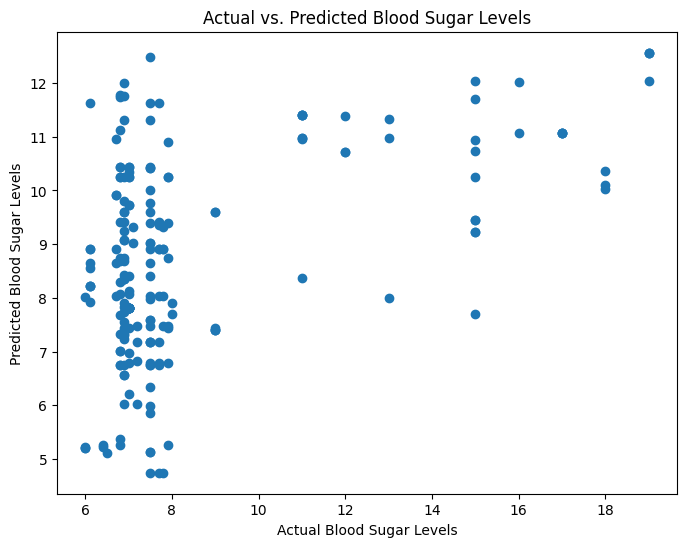

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Blood Sugar Levels")
plt.ylabel("Predicted Blood Sugar Levels")
plt.title("Actual vs. Predicted Blood Sugar Levels")
plt.show()

# Classifier Tree

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [49]:
github_url = 'https://raw.githubusercontent.com/marymorkos/maternalmortalityhealthriskdata/main/Maternal%20Health%20Risk%20Data%20Set%204.csv'
maternal_df = pd.read_csv(github_url)

In [50]:
X = maternal_df.drop(columns=['RiskLevel'])
y = maternal_df['RiskLevel']

In [51]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred = clf.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8177339901477833


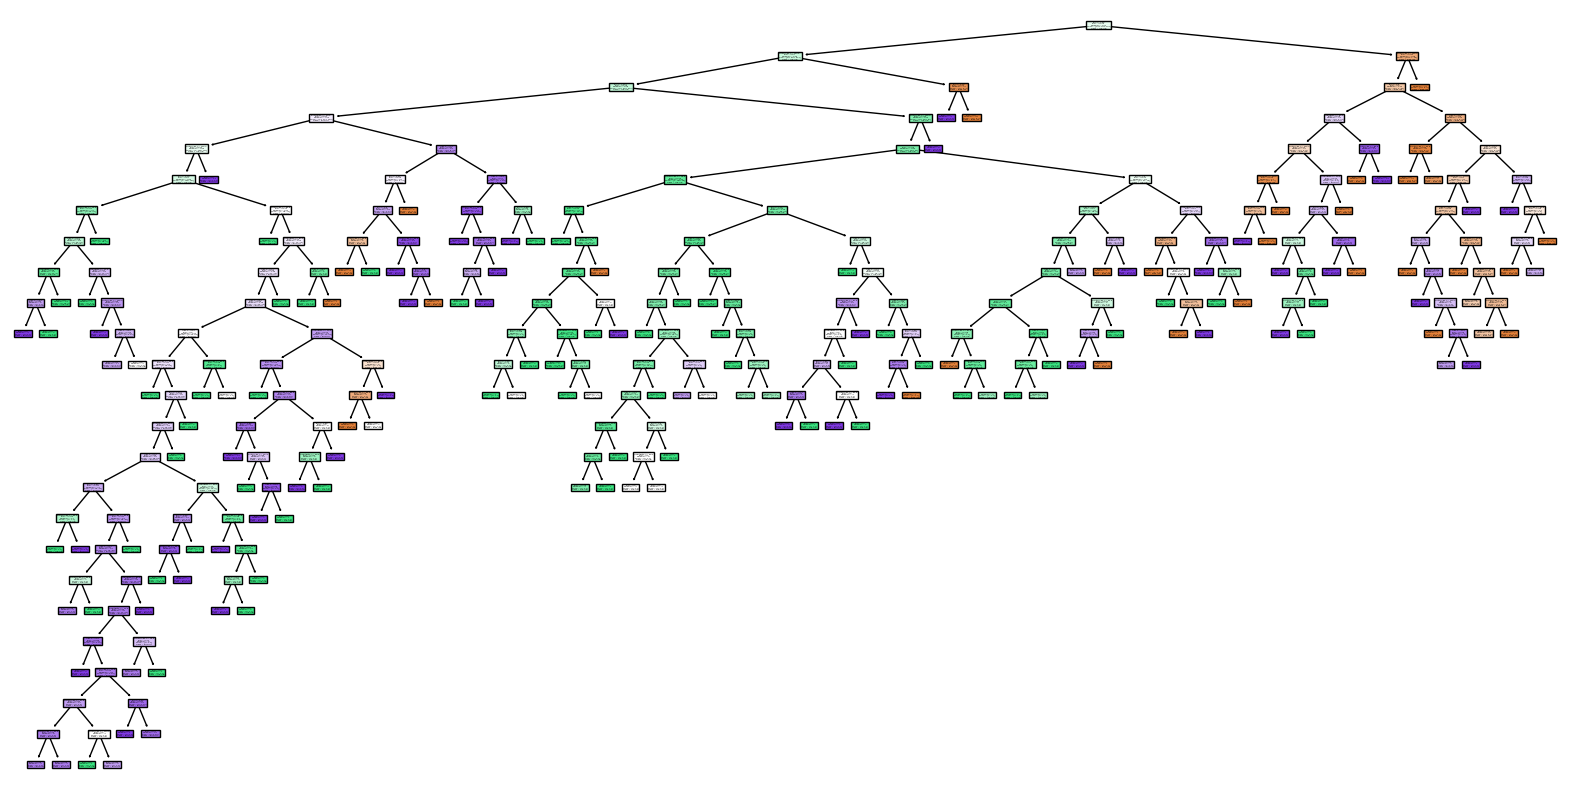

In [56]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()

Accuracy: 0.6502463054187192


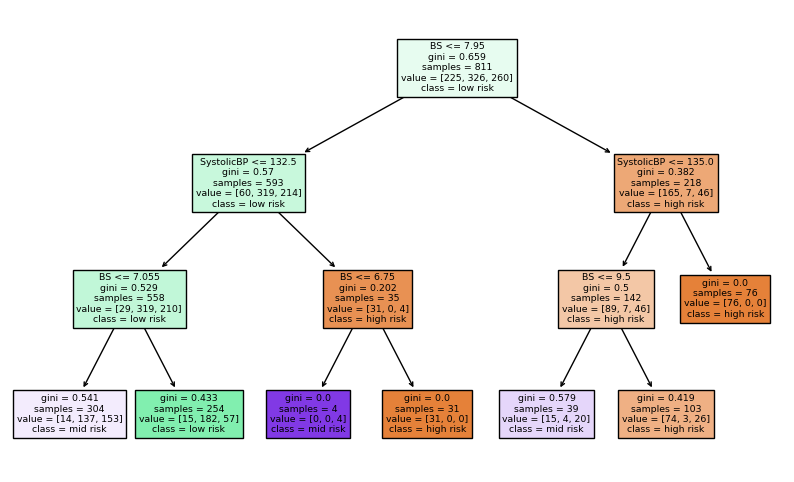

In [57]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjusted max_depth to 2
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()

# Tuning and Validation

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [59]:
github_url = 'https://raw.githubusercontent.com/marymorkos/maternalmortalityhealthriskdata/main/Maternal%20Health%20Risk%20Data%20Set%204.csv'
maternalhealth_df = pd.read_csv(github_url)

In [60]:
numerical_cols = maternalhealth_df.select_dtypes(include=np.number).columns
maternalhealth_df[numerical_cols] = maternalhealth_df[numerical_cols].fillna(maternalhealth_df[numerical_cols].mean())

print("Missing values after filling with average:\n", maternalhealth_df.isnull().sum())

Missing values after filling with average:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [61]:
label_encoder = LabelEncoder()
maternalhealth_df['RiskLevel'] = label_encoder.fit_transform(maternalhealth_df['RiskLevel'])

In [62]:
# Separate features and target variable
X = maternalhealth_df.drop(columns=['BS', 'RiskLevel'])
y = maternalhealth_df['RiskLevel']

In [63]:
model = RandomForestClassifier(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.72413793 0.70935961 0.77339901 0.75369458 0.66336634]


In [64]:
rfe = RFE(estimator=model, n_features_to_select=5, step=1)
rfe.fit(X, y)
selected_features = np.array(X.columns)[rfe.support_]
print("Selected features:", selected_features)

Selected features: ['Age' 'SystolicBP' 'DiastolicBP' 'BodyTemp' 'HeartRate']


In [65]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 150]})

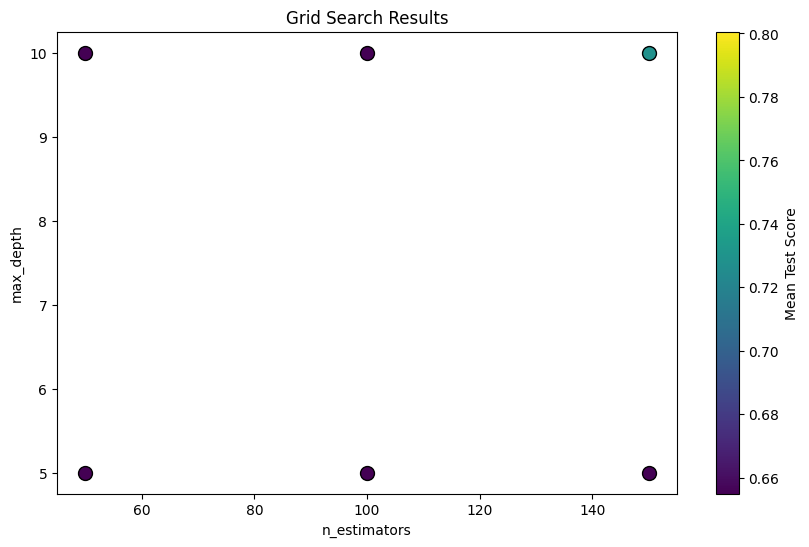

In [66]:
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

plt.figure(figsize=(10, 6))
for mean, param in zip(means, params):
    plt.scatter(param['n_estimators'], param['max_depth'], c=mean, cmap='viridis', s=100, edgecolors='k')

plt.colorbar(label='Mean Test Score')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Results')
plt.show()

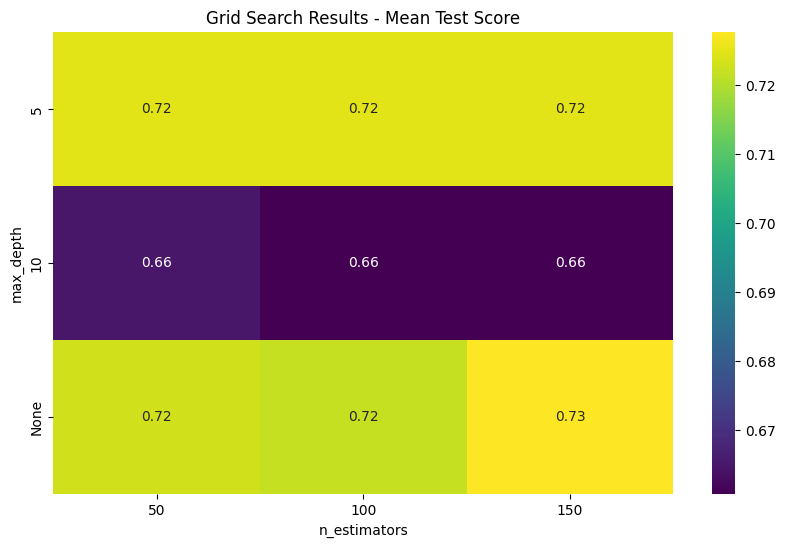

Mean Scores Matrix:
[[0.72479149 0.72479149 0.72478662]
 [0.66467834 0.66073258 0.66074233]
 [0.72284056 0.72185046 0.72776179]]


In [67]:
n_estimators_values = sorted(list(set(param['n_estimators'] for param in params)))
max_depth_values = sorted(list(set(param['max_depth'] for param in params if param['max_depth'] is not None))) + ['None']
mean_scores_matrix = np.array(means).reshape(len(max_depth_values), len(n_estimators_values))

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_scores_matrix, annot=True, cmap='viridis', xticklabels=n_estimators_values, yticklabels=max_depth_values)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Results - Mean Test Score')
plt.show()
print("Mean Scores Matrix:")
print(mean_scores_matrix)